In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# import and process data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# organise the data

# convert from pandas df to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 not required as already zeroes are there
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [34]:
# Create the model
def createModel():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    lossFunction = nn.CrossEntropyLoss() # SoftMax already included in the loss function

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossFunction, optimizer

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8)

# tensor dataset binds the data and labels in one tensor
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)


30

In [55]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=12) # 12 batches
test_loader = DataLoader(test_data, shuffle=False, batch_size=len(test_data)) # all data in batch

In [41]:
for data, labels in train_loader:
    print(data.shape, labels.shape)

print(' ')
for data, labels in test_loader:
    print(data.shape, labels.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
 
torch.Size([30, 4]) torch.Size([30])


In [48]:
# train the model

epochs = 500
def trainModel(ANNiris, lossFunction, optimizer):
    trainAcc = []
    testAcc = []
    losses = []

    for epoch in range(epochs):

        batchAcc = []
        batchLoss = []
        # looping over each batch in all the epochs
        for train_X, train_y in train_loader:
            yHat = ANNiris(train_X)

            loss = lossFunction(yHat, train_y)
            batchLoss.append(loss.detach())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # storing accuracy of all the batches
            batchAcc.append( torch.mean((torch.argmax(yHat, axis=1) == train_y).float()) * 100 )

        # taking mean of all the batch accuracies in one epoch
        # this is training accuracy after 1 epoch
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))

        test_X, test_y = next(iter(test_loader)) # beacuse test_loader is an iteratable object, so extracting. Also, there's only one batch
        predictedLabels = ANNiris(test_X)
        # this is test accuracy after 1 epoch
        testAcc.append(torch.mean((torch.argmax(predictedLabels, axis=1) == test_y).float()) * 100)
    return trainAcc, testAcc, losses


In [56]:

ANNiris, lossFunction, optimizer = createModel()
trainAcc, testAcc, losses = trainModel(ANNiris, lossFunction, optimizer)


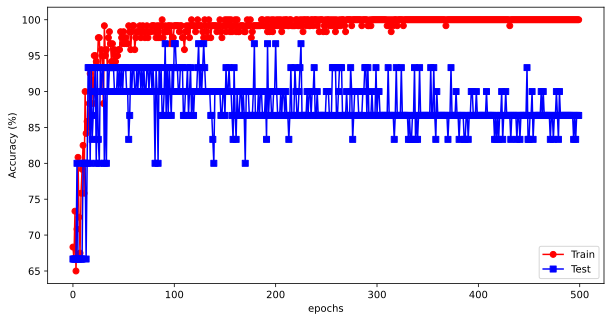

In [57]:
fig = plt.figure(figsize=(10, 5))
plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()

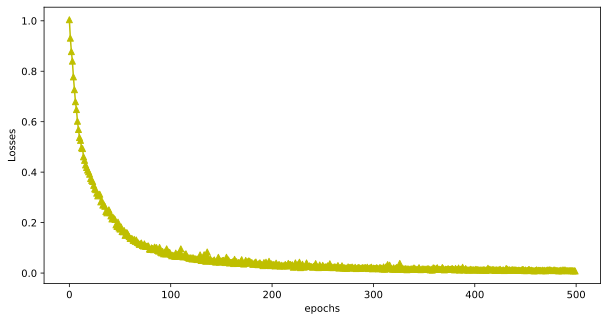

In [58]:
fig = plt.figure(figsize=(10, 5))
plt.plot(losses, 'y^-')
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.show()